<a href="https://colab.research.google.com/github/cantaruttim/Rotinas/blob/main/estudos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

precisamos agora realizar a seguinte operação

$$ ui = q2 - xi$$

$$ vi = x(n + 1 - i)$$

In [ ]:
import pandas as pd

df = pd.read_csv("dados.csv")
serie = df['Idade'].values
serie, len(serie)

(array([23, 23, 35, ..., 54, 42, 17]), 70025)

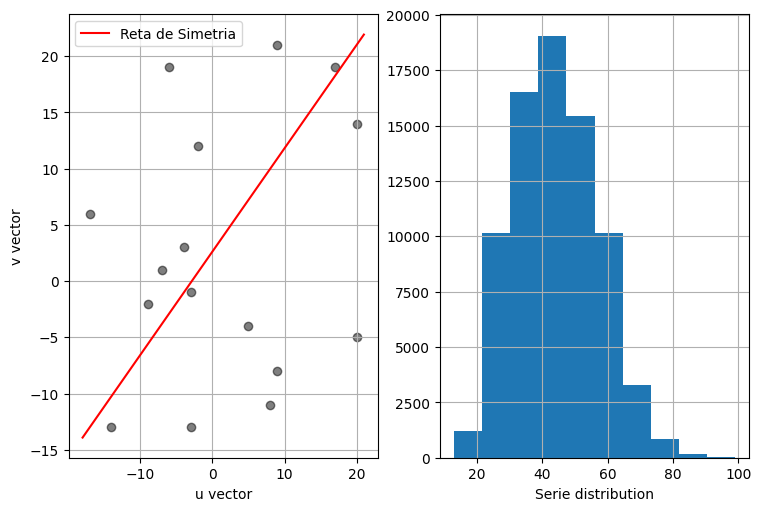

In [ ]:
## função completa

import matplotlib.pyplot as plt
import statsmodels as stats
import numpy as np
import pandas as pd
import seaborn as sns
import math

df = pd.read_csv("dados.csv")
l = df['Idade'].values

def similarity(l):

  serie = l

  u = []
  v = []
  q2 = np.median(l)

  for i in range(len(l)):

    if (q2 - l[i]) == 0:
      break

    else:
      u.append(q2 - l[i])


  for j in range(len(l) + 1):

    if (l[-j] - q2) == 0:
      break

    else:
      v.append(l[-j] - q2)

  return u, v[1:], q2


u, v, q2 = similarity(l)

def letter_equation(u, v):

  m = ( (np.max(v) - np.min(v)) / (np.max(u) - np.min(u) ) )
  b = np.min(v) - m * np.min(u)
  u_values = [np.min(u) - 1, np.max(u) + 1]
  v_values = [m * x_val + b for x_val in u_values]

  return u_values, v_values

u_values, v_values = letter_equation(u, v)

def plotting_similarity(u, v):
  fig, ax = plt.subplots(1, 2, figsize=(7.5,5), layout='constrained')

  ax[0].scatter(u, v, c='black', alpha=0.5)
  ax[0].plot(u_values, v_values, c="red", label = "Reta de Simetria")
  ax[0].grid(True)
  ax[0].set_xlabel("u vector")
  ax[0].set_ylabel("v vector")
  ax[0].legend(loc="upper left")

  ## Personalizar conforme o desvio
  ax[1].hist(l)
  ax[1].set_xlabel("Serie distribution")
  ax[1].grid(True)


plotting_similarity(u, v);

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

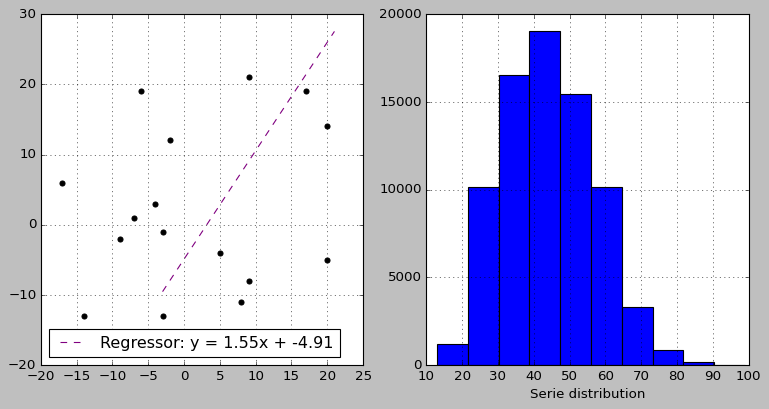

In [ ]:
def sklearn_regressionLine(u, v):


  X_train, X_test, y_train, y_test = train_test_split(u, v, test_size = 0.2, random_state=42)

  m_test = ( (max(v) - min(v))  / (max(X_test) - min(X_test)))
  b_test = np.min(y_test) - m_test * np.min(X_test)
  X_values_test = [np.min(X_test) - 1, np.max(X_test) + 1]
  y_values_test = [m_test * x_val_test + b_test for x_val_test in X_values_test]

  fig, ax = plt.subplots(1, 2, figsize=(9.5,5), layout='constrained')

  ax[0].scatter(u, v, color = 'black')

  ## Reta com o Regressor Linear
  ax[0].plot(X_values_test, y_values_test, color = 'purple', linestyle = '--',
          label = "Regressor: y = {:.2f}x + {:.2f}".format(m_test, b_test))


  ax[0].legend(loc="lower left")
  ax[0].grid(True)

  ## Personalizar conforme o desvio
  ax[1].hist(l)
  ax[1].set_xlabel("Serie distribution")
  ax[1].grid(True)

  return plt.show()

sklearn_regressionLine(u, v)

In [ ]:
def identifica_ponto(u, y):
  return math.sqrt((u - y) ** 2)

p = []

# Calcular as distâncias para cada par de elementos correspondentes em u e v
for i in range(len(u)):
    pontos = identifica_ponto(u[i], v[i])
    p.append(pontos)
print(p)

[25.0, 6.0, 19.0, 10.0, 7.0, 17.0, 1.0, 23.0, 8.0, 2.0, 2.0, 25.0, 7.0, 9.0, 14.0, 12.0]


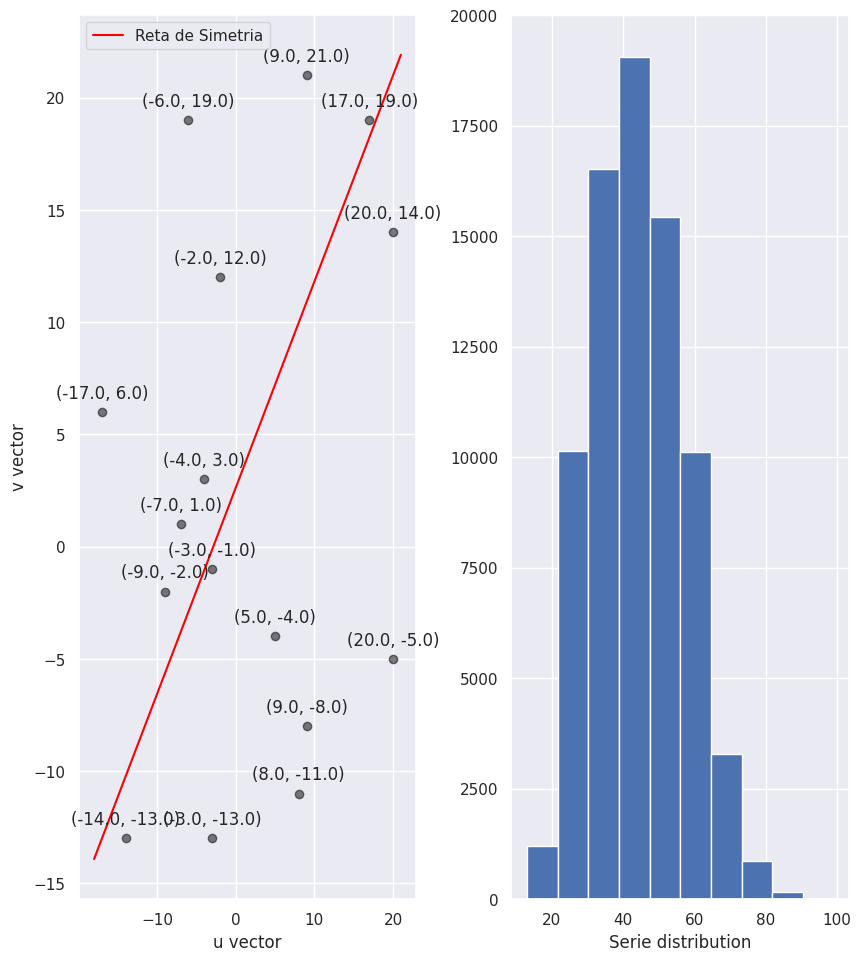

In [ ]:
def plotting_similarity(u, v):
  fig, ax = plt.subplots(1, 2, figsize=(8.5,9.5), layout='constrained')

  ax[0].scatter(u, v, c='black', alpha=0.5)
  ax[0].plot(u_values, v_values, c="red", label = "Reta de Simetria")
  ax[0].grid(True)

  # Adicionar rótulos de texto para cada ponto
  for i, txt in enumerate(v):
    ax[0].annotate(f'({u[i]}, {v[i]})', (u[i], v[i]),
                 textcoords="offset points",
                 xytext=(0, 10), ha='center')

  ax[0].set_xlabel("u vector")
  ax[0].set_ylabel("v vector")
  ax[0].legend(loc="upper left")

  ## Personalizar conforme o desvio
  ax[1].hist(l)
  ax[1].set_xlabel("Serie distribution")
  ax[1].grid(True)


plotting_similarity(u, v);

## Outra forma de calcular a regressão linear

* cálculo da correlação

$$Y = a + bx$$

In [85]:
import pandas as pd

reacao = {"TempoReação":[96,92,106,100,98,104,110,101,116,106,109,100,112,105,118,108,113,112,127,117],
          "Sexo":["H","M","H","M","M","H","H","M","M","H","H","M","M","M","H","H","M","H","M","H"],
          "Idade":[20,20,20,20,25,25,25,25,30,30,30,30,35,35,35,35,40,40,40,40]}

df = pd.DataFrame(reacao)
df

,TempoReação,Sexo,Idade
0,96,H,20
1,92,M,20
2,106,H,20
3,100,M,20
4,98,M,25
5,104,H,25
6,110,H,25
7,101,M,25
8,116,M,30
9,106,H,30


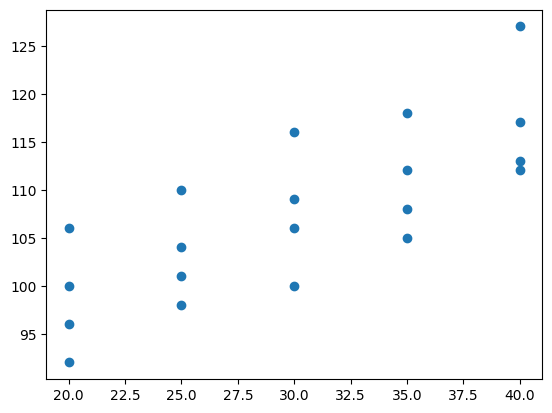

In [87]:
import matplotlib.pyplot as plt


## Podemos observar a dispersão dos nossos dados. Mostrando valores diferentes para cada idade
plt.scatter(df['Idade'], df['TempoReação']);

In [88]:
## vamos criar agora uma regressão que expresse ou se ajuste bem aos dados

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import pearsonr

X = df.iloc[:, -1].values
y = df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

reg = LinearRegression().fit(X_train, y_train)
pred = reg.predict(X_test)

Coeficiente de Determinação R²: 0.52 



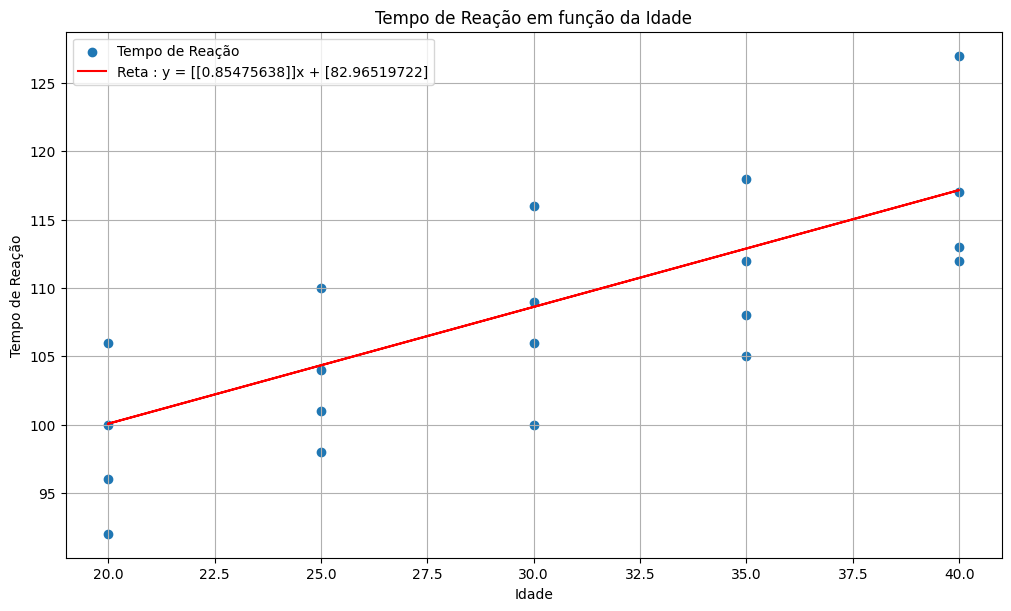



O valor do Mean Absolute Error: 78.8
O valor do Mean Squared Error: 6,209.5
O valor do Root Mean Squared Error: 78.8


In [89]:
print(f"Coeficiente de Determinação R²: {reg.score(X_test, y_test):.2f} \n")


f, ax = plt.subplots(figsize=(10, 6), layout='constrained')

ax.scatter(X, y, label = 'Tempo de Reação')
ax.plot(X_test, pred, color = "red", label = f"Reta : y = {reg.coef_}x + {reg.intercept_}")


ax.set_xlabel('Idade')
ax.set_ylabel('Tempo de Reação')
ax.set_title("Tempo de Reação em função da Idade")

ax.legend()
ax.grid(True)
plt.show();

print("\n")

#### ERRO ####

MAE = mean_absolute_error(X_test, pred)
MSE = mean_squared_error(X_test, pred)
RMSE = mean_squared_error(X_test, pred, squared = False)

print(f"O valor do Mean Absolute Error: {MAE:,.1f}")
print(f"O valor do Mean Squared Error: {MSE:,.1f}")
print(f"O valor do Root Mean Squared Error: {RMSE:,.1f}")

In [91]:
import statsmodels.formula.api as smf

# Fitting linear model
res = smf.ols(formula= "TempoReação ~ Idade", data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TempoReação   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     25.90
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           7.66e-05
Time:                        20:20:13   Log-Likelihood:                -61.754
No. Observations:                  20   AIC:                             127.5
Df Residuals:                      18   BIC:                             129.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.5000      5.451     14.768      0.000      69.048      91.952
Idade          0.9000      0.177      5.089      0.000       0.528       1.272
==============================================================================
Omnibus:                        1.840   Durbin-Watson:                   2.565
Prob(Omnibus):                  0.399   Jarque-Bera (JB):                1.395
Skew:                           0.459   Prob(JB):                        0.498
Kurtosis:                       2.088   Cond. No.                         134.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
# base code
import numpy as np
import seaborn as sns
import statsmodels
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type

style_talk = 'seaborn-talk'    #refer to plt.style.available

class LinearRegDiagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Authors:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.

        Matt Spinelli (m3spinelli@gmail.com, where 3 = r)
        (1) Fixed incorrect annotation of the top most extreme residuals in
            the Residuals vs Fitted and, especially, the Normal Q-Q plots.
        (2) Changed Residuals vs Leverage plot to match closer the y-axis
            range shown in the equivalent plot in the R package ggfortify.
        (3) Added horizontal line at y=0 in Residuals vs Leverage plot to
            match the plots in R package ggfortify and base R.
        (4) Added option for placing a vertical guideline on the Residuals
            vs Leverage plot using the rule of thumb of h = 2p/n to denote
            high leverage (high_leverage_threshold=True).
        (5) Added two more ways to compute the Cook's Distance (D) threshold:
            * 'baseR': D > 1 and D > 0.5 (default)
            * 'convention': D > 4/n
            * 'dof': D > 4 / (n - k - 1)
        (6) Fixed class name to conform to Pascal casing convention
        (7) Fixed Residuals vs Leverage legend to work with loc='best'
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)
        self.nresids = len(self.residual_norm)

    def __call__(self, plot_context='seaborn-paper', **kwargs):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(
                ax=ax[1,1],
                high_leverage_threshold = kwargs.get('high_leverage_threshold'),
                cooks_threshold = kwargs.get('cooks_threshold'))
            plt.show()

        return self.vif_table(), fig, ax,

    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.argsort(residual_abs), 0)
        abs_resid_top_3 = abs_resid[:3]
        for i in abs_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        fig = QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for i, x, y in self.__qq_top_resid(QQ.theoretical_quantiles, abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(x, y),
                ha='right',
                color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')

        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None, high_leverage_threshold=False, cooks_threshold='baseR'):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        factors = []
        if cooks_threshold == 'baseR' or cooks_threshold is None:
            factors = [1, 0.5]
        elif cooks_threshold == 'convention':
            factors = [4/self.nresids]
        elif cooks_threshold == 'dof':
            factors = [4/ (self.nresids - self.nparams)]
        else:
            raise ValueError("threshold_method must be one of the following: 'convention', 'dof', or 'baseR' (default)")
        for i, factor in enumerate(factors):
            label = "Cook's distance" if i == 0 else None
            xtemp, ytemp = self.__cooks_dist_line(factor)
            ax.plot(xtemp, ytemp, label=label, lw=1.25, ls='--', color='red')
            ax.plot(xtemp, np.negative(ytemp), lw=1.25, ls='--', color='red')

        if high_leverage_threshold:
            high_leverage = 2 * self.nparams / self.nresids
            if max(self.leverage) > high_leverage:
                ax.axvline(high_leverage, label='High leverage', ls='-.', color='purple', lw=1)

        ax.axhline(0, ls='dotted', color='black', lw=1.25)
        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_ylim(min(self.residual_norm)-0.1, max(self.residual_norm)+0.1)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        plt.legend(loc='best')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        return (vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y


    def __qq_top_resid(self, quantiles, top_residual_indices):
        """
        Helper generator function yielding the index and coordinates
        """
        offset = 0
        quant_index = 0
        previous_is_negative = None
        for resid_index in top_residual_indices:
            y = self.residual_norm[resid_index]
            is_negative = y < 0
            if previous_is_negative == None or previous_is_negative == is_negative:
                offset += 1
            else:
                quant_index -= offset
            x = quantiles[quant_index] if is_negative else np.flip(quantiles, 0)[quant_index]
            quant_index += 1
            previous_is_negative = is_negative
            yield resid_index, x, y


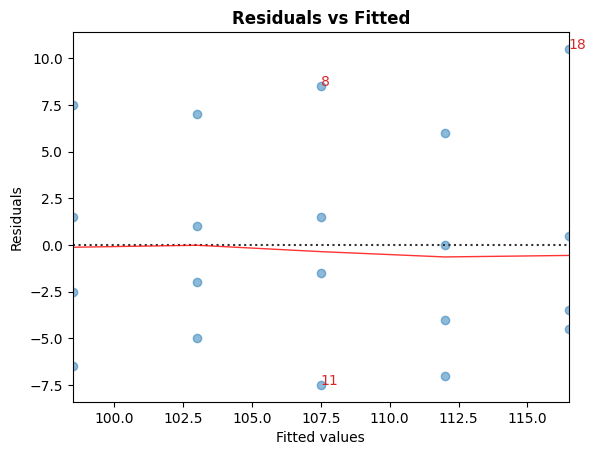

In [100]:
cls = LinearRegDiagnostic(res)
cls.residual_plot();


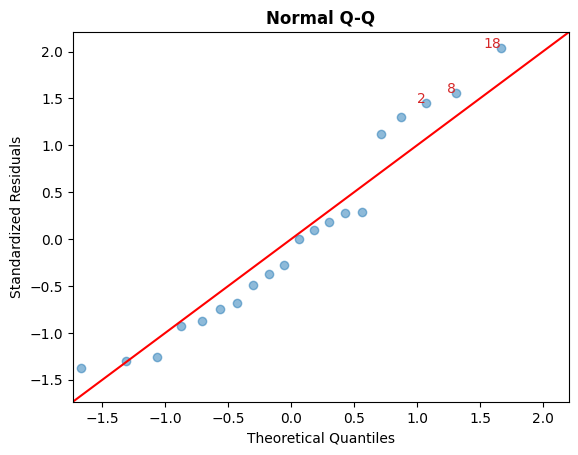

In [101]:
cls.qq_plot();


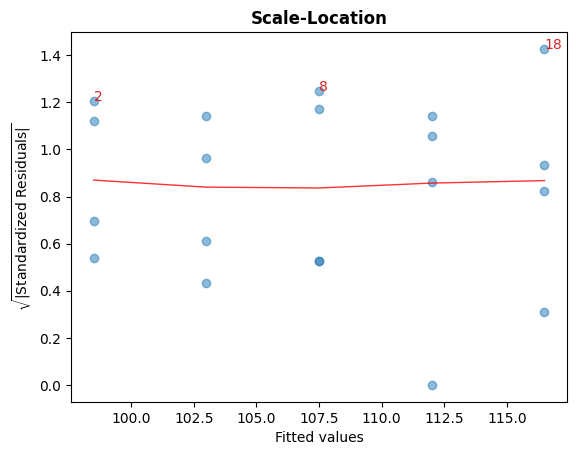

In [102]:
cls.scale_location_plot();


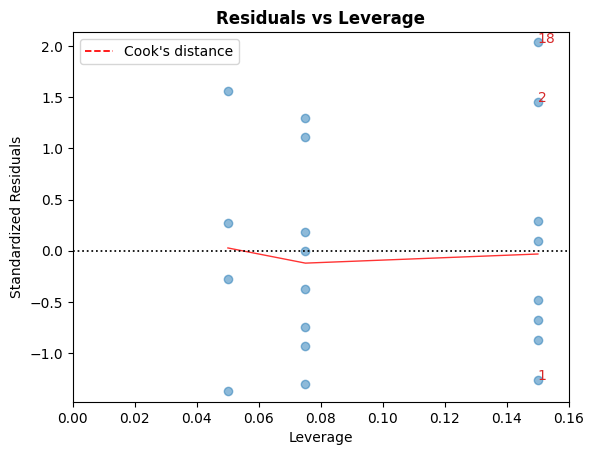

In [103]:
cls.leverage_plot();


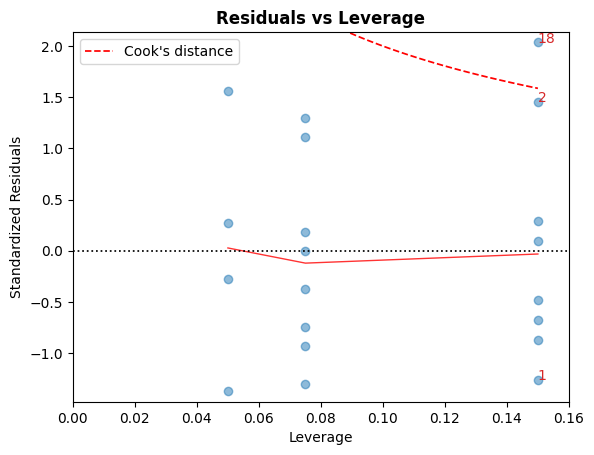

In [104]:
cls.leverage_plot(high_leverage_threshold=True, cooks_threshold='dof');


In [105]:
cls.vif_table()


,Features,VIF Factor
1,Idade,1.0
0,Intercept,19.0


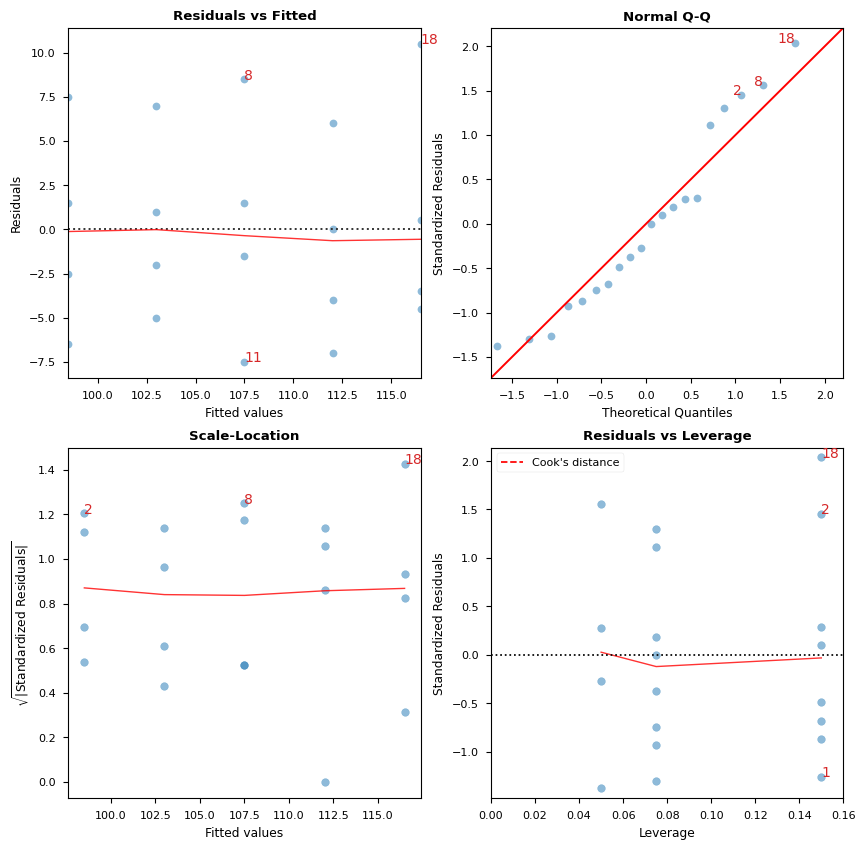

    Features  VIF Factor
1      Idade         1.0
0  Intercept        19.0


In [106]:
# Alternatively, all diagnostics can be generated in one go as follows.
# Fig and ax can be used to modify axes or plot properties after the fact.
cls = LinearRegDiagnostic(res)
vif, fig, ax = cls()
print(vif)

#fig.savefig('../../docs/source/_static/images/linear_regression_diagnostics_plots.png')


In [108]:
## teste com os dados da PINAD

import pandas as pd

df = pd.read_csv("dados.csv")
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


In [111]:
import statsmodels.formula.api as smf

# Fitting linear model
res = smf.ols(formula= "Renda ~ Sexo + Idade + Cor", data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     840.5
Date:                Tue, 07 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:37:31   Log-Likelihood:            -7.3087e+05
No. Observations:               76840   AIC:                         1.462e+06
Df Residuals:                   76836   BIC:                         1.462e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2688.9219     49.772     54.025      0.000    2591.369    2786.475
Sexo        -629.7580     25.577    -24.622      0.000    -679.889    -579.627
Idade          8.7235      0.947      9.213      0.000       6.868      10.579
Cor         -174.7921      4.136    -42.258      0.000    -182.899    -166.685
==============================================================================
Omnibus:                   153970.180   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1375806611.235
Skew:                          15.967   Prob(JB):                         0.00
Kurtosis:                     657.749   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

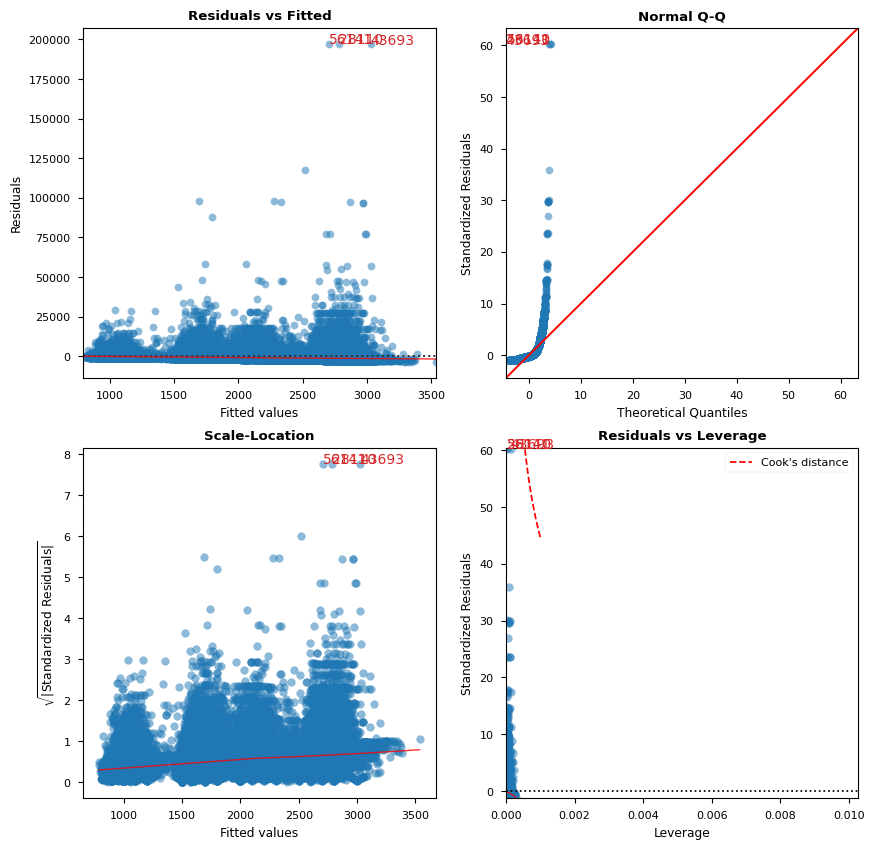

    Features  VIF Factor
1       Sexo         1.0
2      Idade         1.0
3        Cor         1.0
0  Intercept        17.8


In [112]:
# Alternatively, all diagnostics can be generated in one go as follows.
# Fig and ax can be used to modify axes or plot properties after the fact.
cls = LinearRegDiagnostic(res)
vif, fig, ax = cls()
print(vif)

#fig.savefig('../../docs/source/_static/images/linear_regression_diagnostics_plots.png')
